In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



In [150]:
car_dataset = pd.read_csv('/content/car data.csv')


In [151]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [152]:
car_dataset.shape


(301, 9)

In [153]:
car_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [154]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [155]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [156]:
# converting text ot numbers
car_dataset.replace({'Fuel_Type' : {'Petrol':0 , 'Diesel':1 , 'CNG':2}},inplace = True)
car_dataset.replace({'Seller_Type' : {'Dealer':0 , 'Individual':1 }},inplace = True)
car_dataset.replace({'Transmission' : {'Manual':0 , 'Automatic':1 }},inplace = True)


In [157]:
car_dataset.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [158]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [159]:
 print(X)


     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [160]:
print (Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [161]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.1 ,random_state = 2 )

In [162]:
lin_reg_model = LinearRegression()

In [163]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [164]:
#use of predict function
training_data_prediction = lin_reg_model.predict(X_train)

In [165]:
# RSquared error
error_score = metrics.r2_score(Y_train , training_data_prediction)
print("R Squared Error: " , error_score )

R Squared Error:  0.8799451660493711


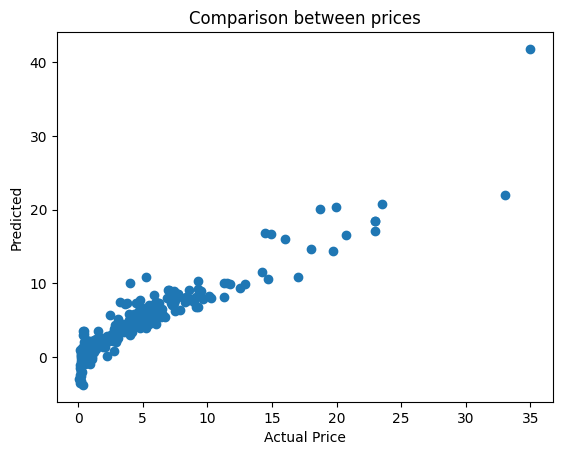

In [166]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted")
plt.title("Comparison between prices")
plt.show()

In [167]:
training_data_prediction = lin_reg_model.predict(X_test)

In [168]:
error_score = metrics.r2_score(Y_test , training_data_prediction)
print("R Squared Error: " , error_score )

R Squared Error:  0.8365766715027051


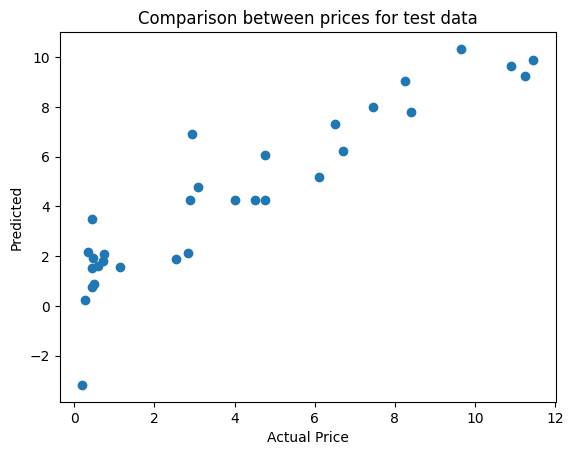

In [169]:
plt.scatter(Y_test , training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted")
plt.title("Comparison between prices for test data")
plt.show()

In [170]:
# same but lasso regression

In [171]:
lasso_reg_model = Lasso()

In [172]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

In [173]:
#use of predict function
training_data_prediction = lasso_reg_model.predict(X_train)

In [174]:
# RSquared error
error_score = metrics.r2_score(Y_train , training_data_prediction)
print("R Squared Error: " , error_score )

R Squared Error:  0.8427856123435794


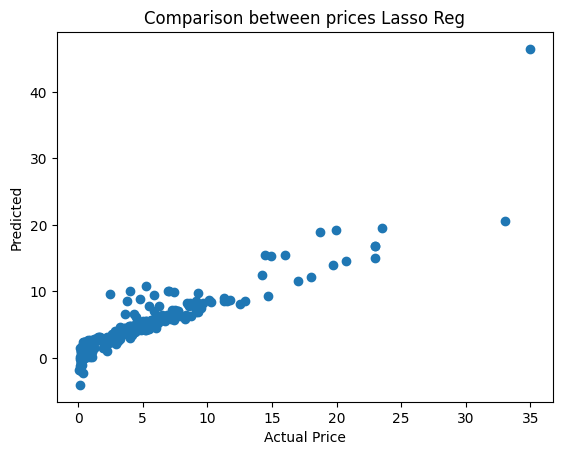

In [175]:
plt.scatter(Y_train , training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted")
plt.title("Comparison between prices Lasso Reg")
plt.show()

In [176]:
training_data_prediction = lasso_reg_model.predict(X_test)

In [177]:
error_score = metrics.r2_score(Y_test , training_data_prediction)
print("R Squared Error: " , error_score )

R Squared Error:  0.8709167941173195


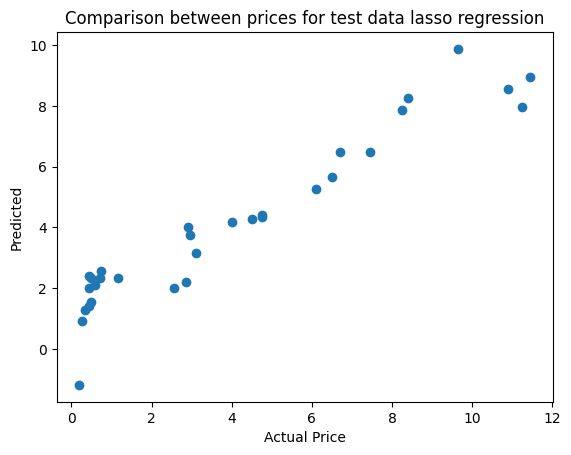

In [178]:
plt.scatter(Y_test , training_data_prediction)
plt.xlabel ("Actual Price")
plt.ylabel("Predicted")
plt.title("Comparison between prices for test data lasso regression")
plt.show()